<a href="https://www.kaggle.com/code/sagunbastola/eda-on-toy-store-e-commerce-database-using-python?scriptVersionId=286891636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toy-store-e-commerce-database/products.csv
/kaggle/input/toy-store-e-commerce-database/order_items.csv
/kaggle/input/toy-store-e-commerce-database/order_item_refunds.csv
/kaggle/input/toy-store-e-commerce-database/orders.csv
/kaggle/input/toy-store-e-commerce-database/website_sessions.csv
/kaggle/input/toy-store-e-commerce-database/_fuzzy_factory_data_dictionary.csv
/kaggle/input/toy-store-e-commerce-database/website_pageviews.csv


In [2]:
factory_dict=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/_fuzzy_factory_data_dictionary.csv')

In [3]:
factory_dict.head()

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...


In [4]:
#dropping the duplicates if any
print(factory_dict.duplicated().sum())
factory_dict.drop_duplicates(inplace=True)
print(factory_dict.duplicated().sum())

0
0


In [5]:
factory_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        36 non-null     object
 1   Field        36 non-null     object
 2   Description  36 non-null     object
dtypes: object(3)
memory usage: 996.0+ bytes


In [6]:
factory_dict["Table"].value_counts()

Table
website_sessions      9
orders                8
order_items           7
order_item_refunds    5
website_pageviews     4
products              3
Name: count, dtype: int64

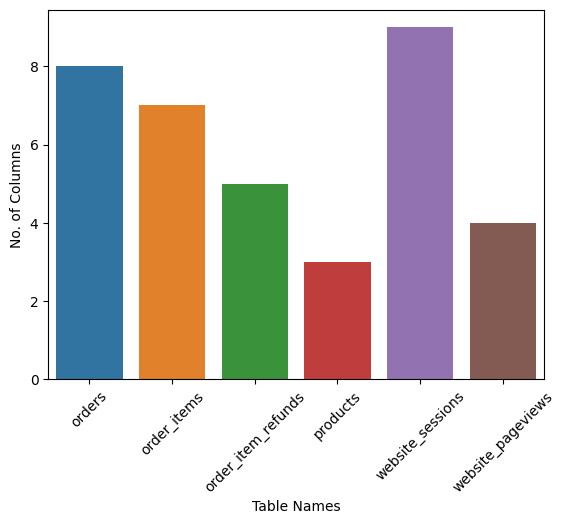

In [7]:
plt.clf() #to clear the previous figure
g=sns.countplot(data=factory_dict,x="Table")
g.set(xlabel="Table Names",ylabel="No. of Columns")
plt.xticks(rotation=45)
plt.show()

In [8]:
order_refunds=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/order_item_refunds.csv')

In [9]:
order_refunds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_item_refund_id  1731 non-null   int64  
 1   created_at            1731 non-null   object 
 2   order_item_id         1731 non-null   int64  
 3   order_id              1731 non-null   int64  
 4   refund_amount_usd     1731 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 67.7+ KB


In [10]:
order_refunds.head()

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.99
1,2,2012-04-13 01:09:43,74,74,49.99
2,3,2012-04-15 07:03:48,71,71,49.99
3,4,2012-04-17 20:00:37,118,118,49.99
4,5,2012-04-22 20:53:49,116,116,49.99


In [11]:
order_refunds.duplicated(subset="order_id").sum() #it contains duplicate id
order_refunds.drop_duplicates(subset="order_id",inplace=True,keep="first")
order_refunds.duplicated(subset="order_id").sum() #check whether it contains duplicate id


0

In [12]:
order_refunds.duplicated(subset=["order_item_id"]).sum() #it contains duplicate id
order_refunds.drop_duplicates(subset="order_item_id",inplace=True,keep="first")
order_refunds.duplicated(subset="order_item_id").sum() #check whether it contains duplicate id


0

In [13]:
order_refunds["created_at"]=pd.to_datetime(order_refunds["created_at"])
order_refunds["day"]=order_refunds["created_at"].dt.strftime("%Y-%m-%d")

In [14]:
order_refunds.head()

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd,day
0,1,2012-04-06 11:32:43,57,57,49.99,2012-04-06
1,2,2012-04-13 01:09:43,74,74,49.99,2012-04-13
2,3,2012-04-15 07:03:48,71,71,49.99,2012-04-15
3,4,2012-04-17 20:00:37,118,118,49.99,2012-04-17
4,5,2012-04-22 20:53:49,116,116,49.99,2012-04-22


In [15]:
value_refunds=order_refunds.groupby("day")["day"].value_counts()
value_refunds.index=pd.to_datetime(value_refunds.index)
value_refunds=pd.DataFrame(value_refunds)
value_refunds

,count
day,
2012-04-06,1
2012-04-13,1
2012-04-15,1
2012-04-17,1
2012-04-22,1
...,...
2015-03-28,2
2015-03-29,1
2015-03-30,2


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

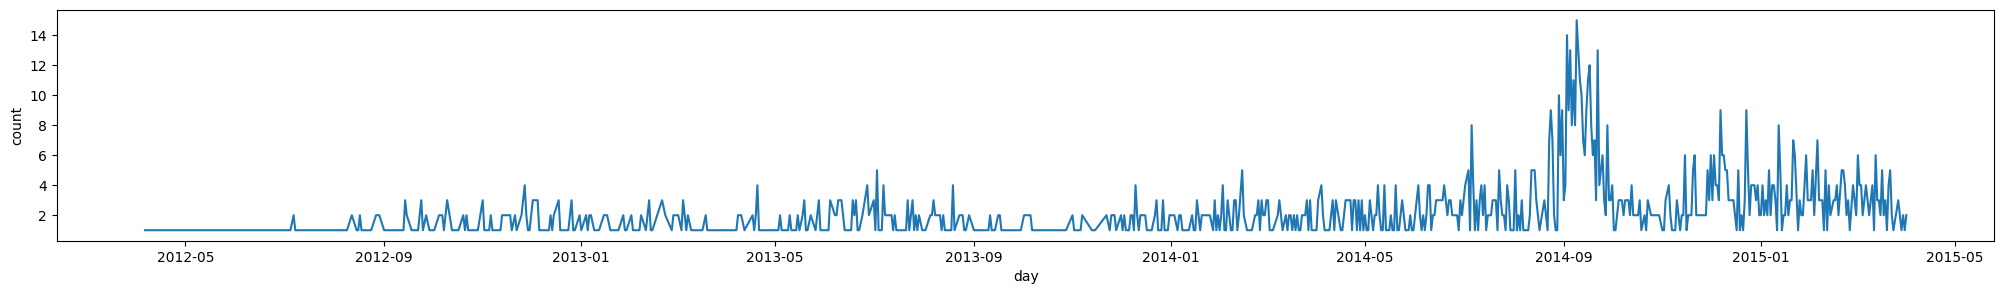

In [16]:
# line plot for the no. of refund per day
plt.clf()
plt.figure(figsize=(25,3))

sns.lineplot(data=value_refunds,x=value_refunds.index,y="count")
plt.show()

In [17]:
max_refunds_per_day=value_refunds.idxmax()

In [18]:
max_refunds_per_day

count   2014-09-09
dtype: datetime64[ns]

In [19]:
value_refunds_amount=order_refunds.groupby("day")["refund_amount_usd"].sum()
value_refunds_amount.index=pd.to_datetime(value_refunds_amount.index)
value_refunds_amount=pd.DataFrame(value_refunds_amount)
value_refunds_amount

,refund_amount_usd
day,
2012-04-06,49.99
2012-04-13,49.99
2012-04-15,49.99
2012-04-17,49.99
2012-04-22,49.99
...,...
2015-03-28,95.98
2015-03-29,49.99
2015-03-30,109.98


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

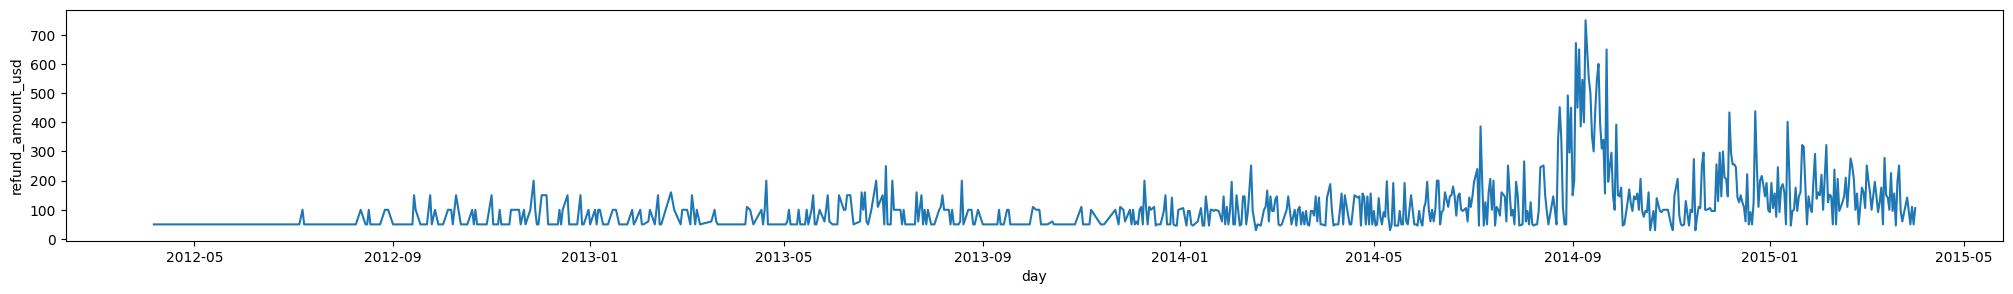

In [20]:
# line plot for the no. of refund per day
plt.clf()
plt.figure(figsize=(25,3))

sns.lineplot(data=value_refunds_amount,x=value_refunds_amount.index,y="refund_amount_usd")
plt.show()

In [21]:
max_refunds_amount_value=value_refunds_amount.idxmax()

In [22]:
max_refunds_amount_value

refund_amount_usd   2014-09-09
dtype: datetime64[ns]

In [23]:
order_item=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/order_items.csv',parse_dates=["created_at"])

In [24]:
order_item.head()

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49


In [25]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_item_id    40025 non-null  int64         
 1   created_at       40025 non-null  datetime64[ns]
 2   order_id         40025 non-null  int64         
 3   product_id       40025 non-null  int64         
 4   is_primary_item  40025 non-null  int64         
 5   price_usd        40025 non-null  float64       
 6   cogs_usd         40025 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 2.1 MB


In [26]:
order_item[["price_usd","cogs_usd"]].describe()

,price_usd,cogs_usd
count,40025.000000,40025.000000
mean,48.432473,18.047976
std,8.012370,3.856821
min,29.990000,9.490000
25%,49.990000,19.490000
50%,49.990000,19.490000
75%,49.990000,19.490000
max,59.990000,22.490000


In [27]:
len(order_item)

40025

In [28]:
#cleaning all the duplicate value if any
print(order_item.duplicated(subset="order_id").sum())
print(order_item.duplicated(subset=["order_id","product_id"]).sum())
print(order_item.duplicated(subset=["order_id","is_primary_item"]).sum())
order_item.drop_duplicates(subset=["order_id","product_id"],inplace=True)
print(order_item.duplicated(subset=["order_id","product_id"]).sum())

7712
0
0
0


In [29]:
order_item.head()

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49


In [30]:
order_item["day"]=order_item["created_at"].dt.strftime("%Y-%m-%d")

In [31]:
time_group=order_item.groupby("day")["day"].value_counts()

In [32]:
time_group=pd.DataFrame(time_group)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

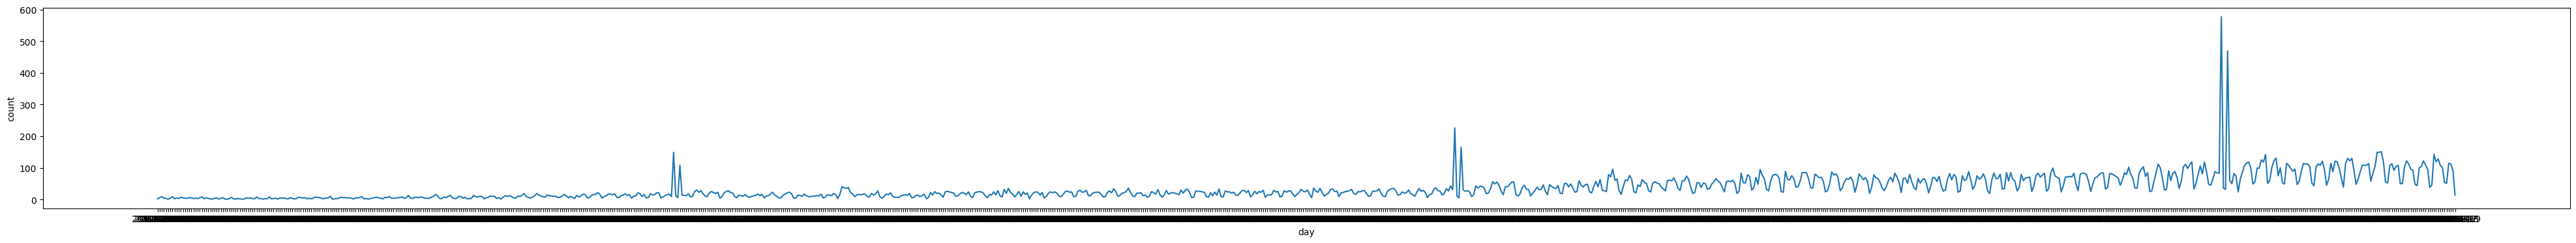

In [33]:
plt.clf()
plt.figure(figsize=(50,4))
sns.lineplot(data=time_group,x=time_group.index,y="count")
plt.show()

In [34]:
value_group=pd.DataFrame(order_item.groupby("day")["price_usd"].sum())

In [35]:
value_group

,price_usd
day,
2012-03-19,99.98
2012-03-20,299.94
2012-03-21,449.91
2012-03-22,199.96
2012-03-23,149.97
...,...
2015-03-15,2355.49
2015-03-16,5290.86
2015-03-17,5202.88


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

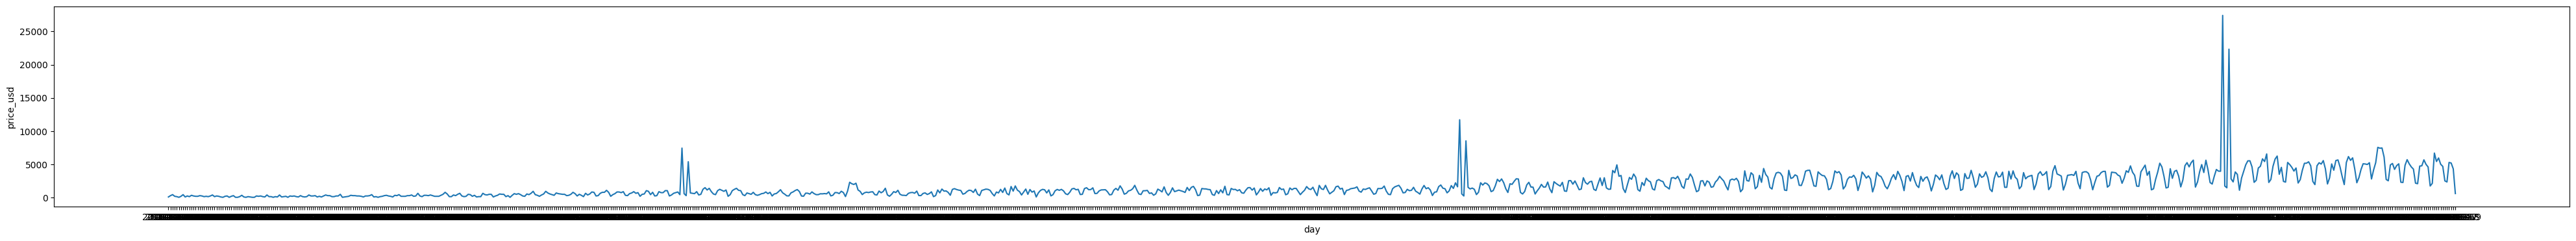

In [36]:
plt.clf()
plt.figure(figsize=(50,4))
sns.lineplot(data=value_group,x=value_group.index,y="price_usd")
plt.show()

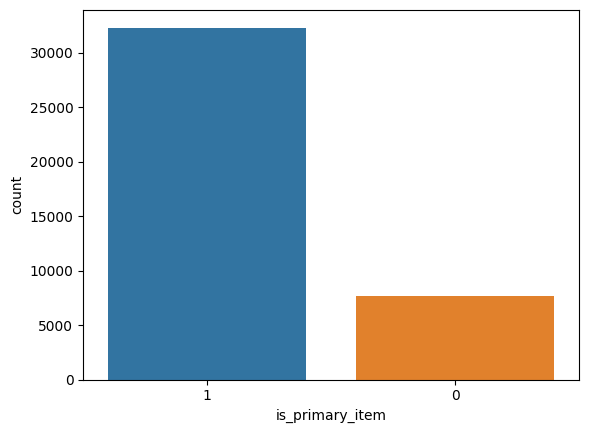

In [37]:
sns.countplot(data=order_item,x="is_primary_item",order=[1,0])
plt.show()

In [38]:
orders=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/orders.csv',parse_dates=True)

In [39]:
orders["created_at"]=pd.to_datetime(orders["created_at"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  int64         
 1   created_at          32313 non-null  datetime64[ns]
 2   website_session_id  32313 non-null  int64         
 3   user_id             32313 non-null  int64         
 4   primary_product_id  32313 non-null  int64         
 5   items_purchased     32313 non-null  int64         
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            32313 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 2.0 MB


In [40]:
orders.head()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49


In [41]:
orders.describe()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
count,32313.000000,32313,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000
mean,16157.000000,2014-04-14 03:01:01.276823296,258292.288707,215691.622629,1.392474,1.238666,59.991636,22.355406
min,1.000000,2012-03-19 10:42:46,20.000000,13.000000,1.000000,1.000000,29.990000,9.490000
25%,8079.000000,2013-10-30 14:30:35,144828.000000,124135.000000,1.000000,1.000000,49.990000,19.490000
50%,16157.000000,2014-06-11 14:27:02,263554.000000,221461.000000,1.000000,1.000000,49.990000,19.490000
75%,24235.000000,2014-11-28 10:53:48,374799.000000,310542.000000,2.000000,1.000000,59.990000,22.490000
max,32313.000000,2015-03-19 05:38:31,472818.000000,394273.000000,4.000000,2.000000,109.980000,41.980000
std,9328.103961,NaN,132427.649842,108402.203189,0.732277,0.426274,17.808771,6.238621


In [42]:
website_view=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/website_pageviews.csv',parse_dates=True)
product=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/products.csv',parse_dates=True)

In [43]:
website_view.head()

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,2012-03-19 08:04:16,1,/home
1,2,2012-03-19 08:16:49,2,/home
2,3,2012-03-19 08:26:55,3,/home
3,4,2012-03-19 08:37:33,4,/home
4,5,2012-03-19 09:00:55,5,/home


In [44]:
website_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188124 entries, 0 to 1188123
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   website_pageview_id  1188124 non-null  int64 
 1   created_at           1188124 non-null  object
 2   website_session_id   1188124 non-null  int64 
 3   pageview_url         1188124 non-null  object
dtypes: int64(2), object(2)
memory usage: 36.3+ MB


In [45]:
website_view["pageview_url"].value_counts()

pageview_url
/products                      261231
/the-original-mr-fuzzy         162525
/home                          137576
/lander-2                      131170
/cart                           94953
/lander-3                       79000
/lander-5                       68166
/shipping                       64484
/billing-2                      48441
/lander-1                       47574
/thank-you-for-your-order       32313
/the-forever-love-bear          26033
/the-birthday-sugar-panda       19046
/lander-4                        9385
/billing                         3617
/the-hudson-river-mini-bear      2610
Name: count, dtype: int64

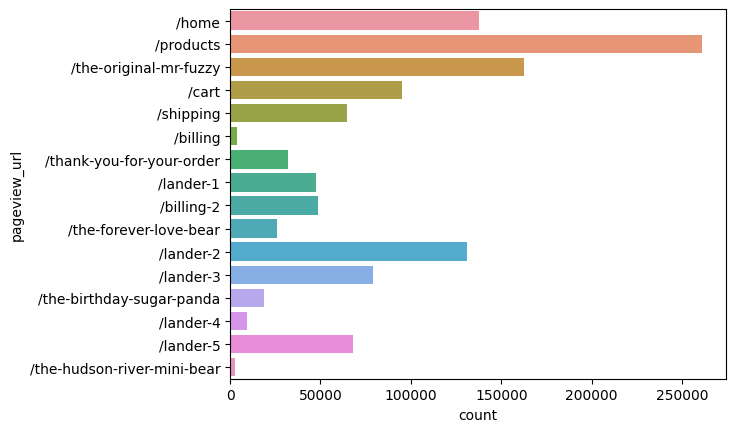

In [46]:
sns.countplot(data=website_view,y="pageview_url")
plt.show()

In [47]:
product

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


In [48]:
website_sessions=pd.read_csv('/kaggle/input/toy-store-e-commerce-database/website_sessions.csv',parse_dates=True)
website_sessions

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
...,...,...,...,...,...,...,...,...,...
472866,472867,2015-03-19 07:49:25,394314,0,gsearch,brand,g_ad_2,desktop,https://www.gsearch.com
472867,472868,2015-03-19 07:54:36,394315,0,bsearch,nonbrand,b_ad_1,mobile,https://www.bsearch.com
472868,472869,2015-03-19 07:55:40,394316,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
472869,472870,2015-03-19 07:56:29,394317,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


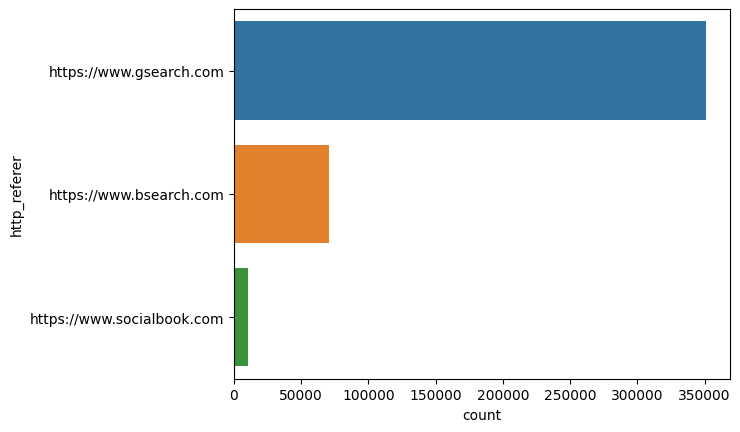

In [49]:
sns.countplot(data=website_sessions,y="http_referer")
plt.show()

In [50]:
website_sessions.head(1)

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [51]:
website_view.head(1)

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,2012-03-19 08:04:16,1,/home


In [52]:
website=website_view.merge(website_sessions,how="inner",on=["created_at","website_session_id"])

In [53]:
website.head()

,website_pageview_id,created_at,website_session_id,pageview_url,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,/home,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,2012-03-19 08:16:49,2,/home,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,2012-03-19 08:26:55,3,/home,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,2012-03-19 08:37:33,4,/home,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,2012-03-19 09:00:55,5,/home,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


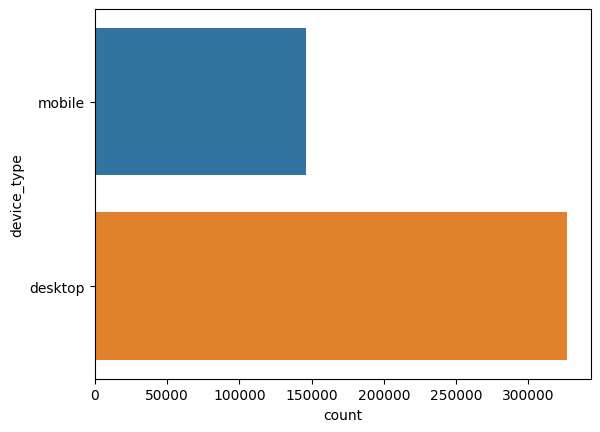

In [54]:
sns.countplot(data=website,y="device_type")
plt.show()

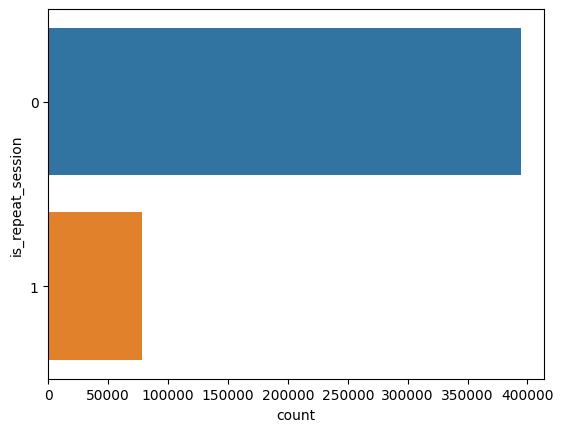

In [55]:
sns.countplot(data=website,y="is_repeat_session")
plt.show()

In [56]:
website.head(1)

,website_pageview_id,created_at,website_session_id,pageview_url,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,/home,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [57]:
website.info()
website["created_at"]=pd.to_datetime(website["created_at"])
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   website_pageview_id  472871 non-null  int64 
 1   created_at           472871 non-null  object
 2   website_session_id   472871 non-null  int64 
 3   pageview_url         472871 non-null  object
 4   user_id              472871 non-null  int64 
 5   is_repeat_session    472871 non-null  int64 
 6   utm_source           389543 non-null  object
 7   utm_campaign         389543 non-null  object
 8   utm_content          389543 non-null  object
 9   device_type          472871 non-null  object
 10  http_referer         432954 non-null  object
dtypes: int64(4), object(7)
memory usage: 39.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------        

In [58]:

order_website=orders.merge(website,how="inner",on=["created_at"])
orders.head(1)

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49


In [59]:
order_website.head(2)

,order_id,created_at,website_session_id_x,user_id_x,primary_product_id,items_purchased,price_usd,cogs_usd,website_pageview_id,website_session_id_y,pageview_url,user_id_y,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,31,2012-03-26 10:25:44,1023,1021,1,1,49.99,19.49,1969,1031,/home,1029,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
1,526,2012-07-23 08:47:18,16214,15007,1,1,49.99,19.49,33269,16215,/home,15008,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


In [60]:
order_item.head()

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd,day
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49,2012-03-19
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49,2012-03-19
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49,2012-03-20
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49,2012-03-20
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49,2012-03-20


In [61]:
order_product=order_item.merge(product,on="product_id",suffixes=["_order","_product"])

In [62]:
order_product.head(1)


,order_item_id,created_at_order,order_id,product_id,is_primary_item,price_usd,cogs_usd,day,created_at_product,product_name
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49,2012-03-19,2012-03-19 08:00:00,The Original Mr. Fuzzy


In [63]:
order_product[order_product["product_name"]=="The Forever Love Bear"]

,order_item_id,created_at_order,order_id,product_id,is_primary_item,price_usd,cogs_usd,day,created_at_product,product_name
2661,2662,2013-01-07 11:40:06,2662,2,1,59.99,22.49,2013-01-07,2013-01-06 13:00:00,The Forever Love Bear
2662,2663,2013-01-07 12:33:34,2663,2,1,59.99,22.49,2013-01-07,2013-01-06 13:00:00,The Forever Love Bear
2681,2682,2013-01-08 15:30:56,2682,2,1,59.99,22.49,2013-01-08,2013-01-06 13:00:00,The Forever Love Bear
2682,2683,2013-01-08 15:33:31,2683,2,1,59.99,22.49,2013-01-08,2013-01-06 13:00:00,The Forever Love Bear
2687,2688,2013-01-08 17:51:08,2688,2,1,59.99,22.49,2013-01-08,2013-01-06 13:00:00,The Forever Love Bear
...,...,...,...,...,...,...,...,...,...,...
39989,39990,2015-03-18 17:38:05,32286,2,1,59.99,22.49,2015-03-18,2013-01-06 13:00:00,The Forever Love Bear
39991,39992,2015-03-18 18:10:53,32288,2,1,59.99,22.49,2015-03-18,2013-01-06 13:00:00,The Forever Love Bear
39993,39994,2015-03-18 18:15:07,32289,2,0,59.99,22.49,2015-03-18,2013-01-06 13:00:00,The Forever Love Bear
40012,40013,2015-03-19 00:19:57,32303,2,1,59.99,22.49,2015-03-19,2013-01-06 13:00:00,The Forever Love Bear


In [64]:
order_product["product_name"].value_counts()

product_name
The Original Mr. Fuzzy        24226
The Forever Love Bear          5796
The Hudson River Mini bear     5018
The Birthday Sugar Panda       4985
Name: count, dtype: int64

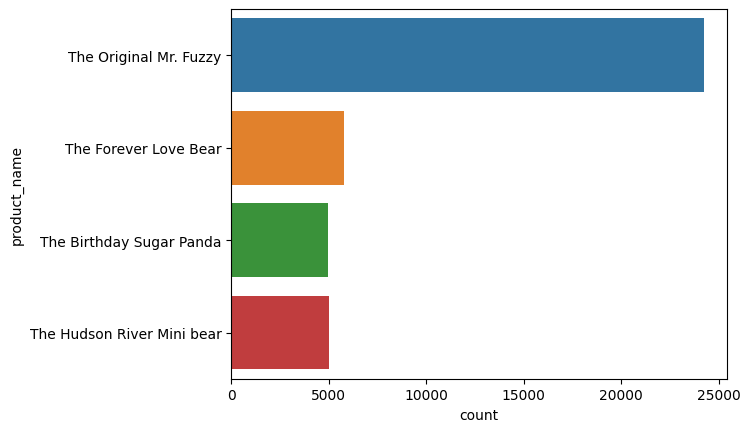

In [65]:
#product ordered
sns.countplot(data=order_product,y="product_name")
plt.show()

In [66]:
#Total order value of each product
order_value=pd.DataFrame(order_product.groupby("product_name")["price_usd"].sum())
order_value

,price_usd
product_name,
The Birthday Sugar Panda,229260.15
The Forever Love Bear,347702.04
The Hudson River Mini bear,150489.82
The Original Mr. Fuzzy,1211057.74


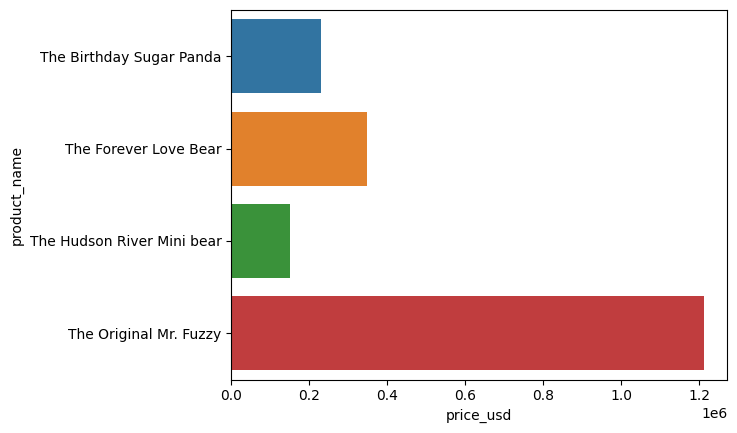

In [67]:
sns.barplot(data=order_value,y=order_value.index,x="price_usd")
plt.show()

In [68]:
orders.head(1)

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49


In [69]:
print(len(orders))
print(len(website_sessions))

32313
472871


In [70]:
website_sessions.head(1)

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [71]:
order_left_website_sessions=orders.merge(website_sessions,how="right",on=["website_session_id"])
print(len(order_left_website_sessions))

472871


In [72]:
order_left_website_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            32313 non-null   float64       
 1   created_at_x        32313 non-null   datetime64[ns]
 2   website_session_id  472871 non-null  int64         
 3   user_id_x           32313 non-null   float64       
 4   primary_product_id  32313 non-null   float64       
 5   items_purchased     32313 non-null   float64       
 6   price_usd           32313 non-null   float64       
 7   cogs_usd            32313 non-null   float64       
 8   created_at_y        472871 non-null  object        
 9   user_id_y           472871 non-null  int64         
 10  is_repeat_session   472871 non-null  int64         
 11  utm_source          389543 non-null  object        
 12  utm_campaign        389543 non-null  object        
 13  utm_content         389543 no

In [73]:
order_id_null=order_left_website_sessions[order_left_website_sessions["order_id"].isna()]

In [74]:
order_id_null.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,order_id,created_at_x,website_session_id,user_id_x,primary_product_id,items_purchased,price_usd,cogs_usd,created_at_y,user_id_y,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,NaN,NaT,2,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,NaN,NaT,3,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,NaN,NaT,4,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,NaN,NaT,5,NaN,NaN,NaN,NaN,NaN,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [75]:
website_order_null=order_id_null.merge(website_view,how="inner",on=["website_session_id"])

In [76]:
website_order_null.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,order_id,created_at_x,website_session_id,user_id_x,primary_product_id,items_purchased,price_usd,cogs_usd,created_at_y,user_id_y,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer,website_pageview_id,created_at,pageview_url
0,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com,1,2012-03-19 08:04:16,/home
1,NaN,NaT,2,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,2,2012-03-19 08:16:49,/home
2,NaN,NaT,3,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,3,2012-03-19 08:26:55,/home
3,NaN,NaT,4,NaN,NaN,NaN,NaN,NaN,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,4,2012-03-19 08:37:33,/home
4,NaN,NaT,5,NaN,NaN,NaN,NaN,NaN,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com,5,2012-03-19 09:00:55,/home


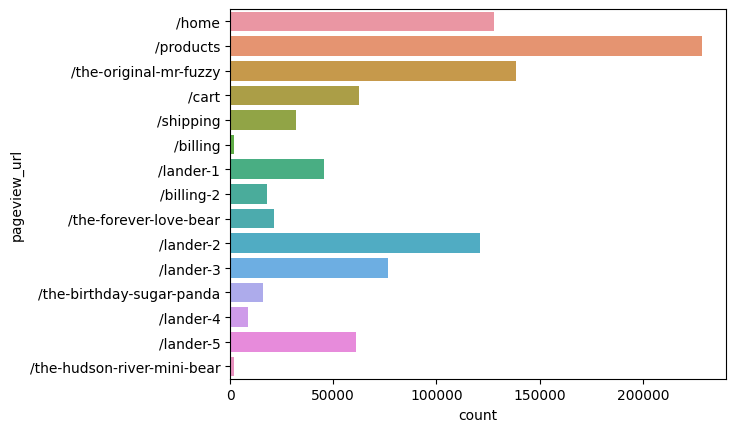

In [77]:
#rejection in the website visulaization
sns.countplot(data=website_order_null,y="pageview_url")
plt.show()